## Машинное обучение, ФКН ВШЭ

## Практическое задание 4

### Общая информация
Дата выдачи: 12 октября 2018

Мягкий дедлайн: 7:59MSK 20 октября 2018 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 21 октября 2018.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-04-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-04-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

** Оценка:** ...

In [2]:
%pylab inline

import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, roc_curve, auc, \
                            precision_recall_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [3]:
X, y = make_classification(n_samples=100000, n_features=20,
                                    n_informative=10, n_redundant=10,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(2 балла)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [4]:
clf_linear = svm.LinearSVC(random_state=43)
clf_linear.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=43, tol=0.0001,
     verbose=0)

In [6]:
pred = clf_linear.predict(X_test)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

Здесь посчитаем FPR и TPR, pressision и recall в ручную для трешхолда, равного нулю, и выдаваемыми значениями 1 и -1 (собственно как и работает SVM)

In [7]:
TP_FN = (y_test==1).astype(int).sum()
TP = ((pred==1)*(y_test==1)).astype(int).sum()
TPR = TP/TP_FN
TPR

0.84707926747761

In [8]:
TN_FP = (y_test==0).astype(int).sum()
FP = ((pred==1)*(y_test==0)).astype(int).sum()
FPR = FP/TN_FP
FPR

0.15108392073414018

In [9]:
FN = ((pred==0)*(y_test==1)).astype(int).sum()
pressision = TP/(TP+FP)
recall = TP/(TP+FN)
print('recall =', recall)
print('precision =', pressision)

recall = 0.84707926747761
precision = 0.8479860832329721


Теперь используем функции из sklean, чтобы посчитать ROC-AUC и PR-AUC. В качестве численных значений будем использовать значения decision_function SVM

In [10]:
distance_test = clf_linear.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, distance_test)
precision, recall, _ = precision_recall_curve(y_test, distance_test)

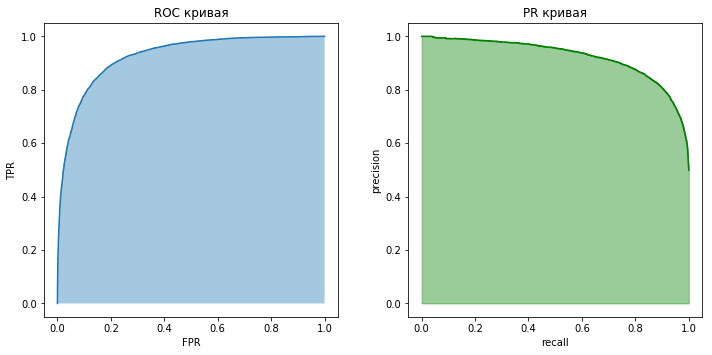

In [11]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)


# ROC кривая
fig.add_subplot(121)
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, alpha=0.4)
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('ROC кривая')
plt.xlabel('FPR')
plt.ylabel('TPR')



# RC кривая
fig.add_subplot(122)
plt.plot(recall, precision, c='g')
plt.fill_between(recall, precision, color='g', alpha=0.4)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('PR кривая')
plt.xlabel('recall')
plt.ylabel('precision')
plt.tight_layout(w_pad=3)
plt.show()


In [160]:
print('ROC-AUC =', auc(fpr, tpr))
print('PR-AUC =', auc(recall, precision))

ROC-AUC = 0.9254435837357109
PR-AUC = 0.924203664258838


В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

In [38]:
X, y = make_classification(n_samples=500, n_features=2,
                                    n_informative=2, n_redundant=0,
                                    random_state=47)


In [39]:
clf_synthetic = svm.SVC(kernel='linear', random_state=47)
clf_synthetic.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=47, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
sup_vectors = clf_synthetic.support_vectors_
div_line = clf_synthetic.coef_

In [48]:
colors_obj = np.zeros(sup_vectors.shape[0])
colors_obj = copy(y[clf_synthetic.support_])
colors_sup = ['g' if x==1 else 'r' for x in colors_obj]
colors_not_sup = ['g' if y_i==1 else 'r' for y_i in y]


In [62]:
a_coef, b_coef = div_line[0]
def get_x(y):
    return -b_coef/a_coef*y

y1 = 3
y2 = -4
x1 = get_x(y1)
x2 = get_x(y2)

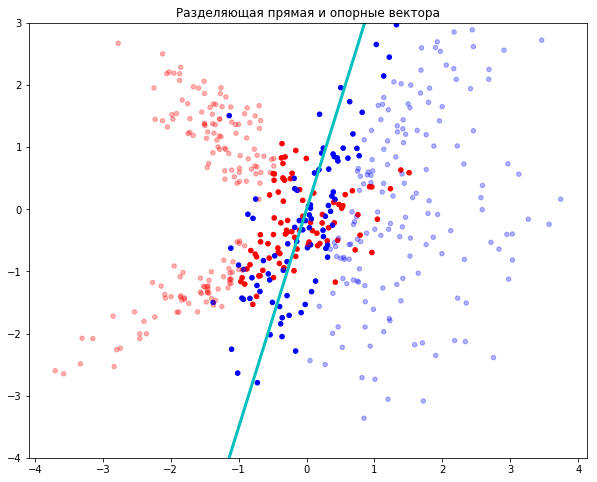

In [71]:
fig = plt.figure(figsize=(10, 8))
plt.title('Разделяющая прямая и опорные вектора')
plt.plot([x1, x2], [y1, y2], c='c', linewidth=3)
plt.scatter(sup_vectors[:,0], sup_vectors[:,1], c=colors_sup, s=20)
plt.scatter(X[:,0], X[:,1], c=colors_not_sup, alpha=0.3, s=20)
plt.ylim(y2, y1)
plt.show()

Берюзовым показана разделяющая прямая. Объекты одного класса синие, другого - красный. Оперные вектора нарисованы 'жирно', у остальных коэффицент прозрачноcти 0.3

Мы видим, что многие опорные вектора, попали в чужую область - это легко объясняется методом пристального взгляда: действительно, наша выборка линейна неразделима, значит на некоторых векторах, находящихся у условной границы алгоритм будет ошибаться 

__Задание 2.__ Калибровка вероятностей.

__(2 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [172]:
X, y = make_classification(n_samples=10000, n_features=2,
                                    n_informative=2, n_redundant=0,
                                    random_state=47)

In [202]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((r + l) / 2)
        # неравильно считался центр
        
        count_catch = np.count_nonzero([(preds >= l) & (preds < r)])
        count_catch = count_catch if count_catch!=0 else 1
        bin_real_ratios.append(np.count_nonzero(y_test[(preds >= l) & (preds < r)] == 1) /
                               count_catch ) 
        # не делили на количесвто всех объектов, значения функции на которых попали в промежуток
    plt.grid(True)
    plt.plot(bin_middle_points, bin_real_ratios)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


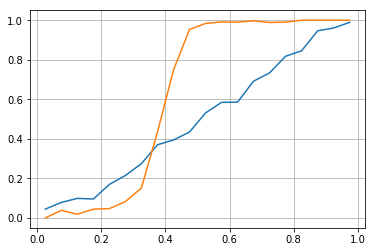

In [203]:
plot_calibration_curve(y, prob_x[:,1])
plot_calibration_curve(y, prob_SVM_x)

In [179]:
log_reg = LogisticRegression(random_state=47).fit(X, y)


In [180]:
prob_x = log_reg.predict_proba(X)

In [175]:
clf_synthetic = svm.SVC(kernel='linear', random_state=47)
clf_synthetic.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=47, shrinking=True,
  tol=0.001, verbose=False)

In [176]:
prob_SVM_x = clf_synthetic.decision_function(X)
prob_SVM_x = (prob_SVM_x - prob_SVM_x.min())/(prob_SVM_x.max() - prob_SVM_x.min())

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

Перепишем немного функцию, чтобы графики получились красивыми

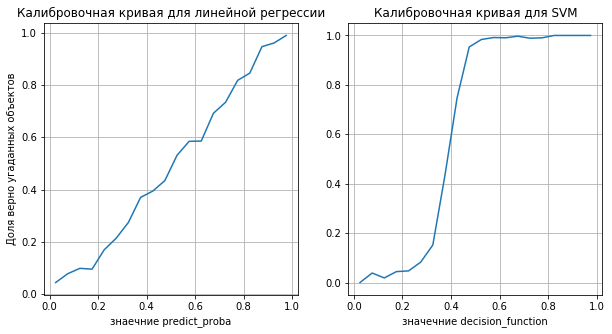

In [201]:
bin_middle_points = []
bin_real_ratios = []
n_bins = 20
fig = plt.figure(figsize=(10,5))


y_test = y
preds = prob_x[:,1]
fig.add_subplot(121)
for i in range(n_bins):
    l = 1.0 / n_bins * i
    r = 1.0 / n_bins * (i + 1)
    bin_middle_points.append((r + l) / 2)
        
    count_catch = np.count_nonzero([(preds >= l) & (preds < r)])
    count_catch = count_catch if count_catch!=0 else 1
    bin_real_ratios.append(np.count_nonzero(y_test[(preds >= l) & (preds < r)] == 1) /
                               count_catch ) 
plt.grid(True)
plt.title('Калибровочная кривая для линейной регрессии')
plt.plot(bin_middle_points, bin_real_ratios)
plt.ylabel('Доля верно угаданных объектов')
plt.xlabel('значение predict_proba')

bin_middle_points = []
bin_real_ratios = []
preds = prob_SVM_x
fig.add_subplot(122)
for i in range(n_bins):
    l = 1.0 / n_bins * i
    r = 1.0 / n_bins * (i + 1)
    bin_middle_points.append((r + l) / 2)
    # неравильно считался центр
        
    count_catch = np.count_nonzero([(preds >= l) & (preds < r)])
    count_catch = count_catch if count_catch!=0 else 1
    bin_real_ratios.append(np.count_nonzero(y_test[(preds >= l) & (preds < r)] == 1) /
                               count_catch ) 
plt.grid(True)
plt.title('Калибровочная кривая для SVM')
plt.plot(bin_middle_points, bin_real_ratios)
plt.xlabel('нормированное значение decision_function');
plt.show()


Судя по графику SVM не предсказывает вероятности, но это так и есть: ведь мы находим один точный порог (разделяющую прямую), все объкты (в идеальном случае) по одну сторону одного класса, по другую - другого. Отметим, то что здесь порог условно равен 0.4 - это, по-видимому, произошло из-за того, что при MinMaxScaler (который тут реализован, а не взят из библиотеки) неустойчив к выбросам, и нашелся какой-то объект с очень большим значением отсутпа)

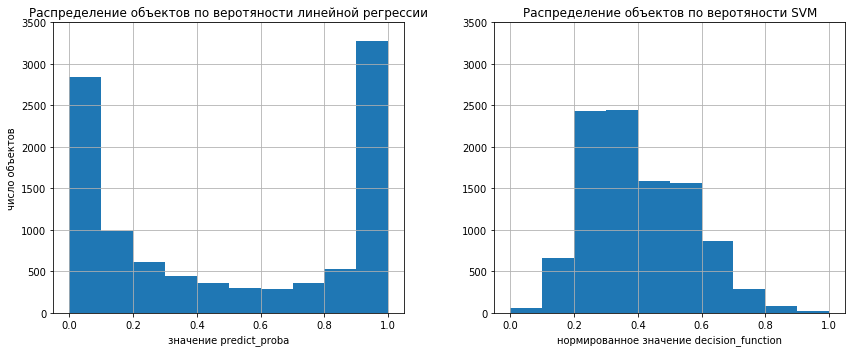

In [253]:
fig = plt.figure(figsize=(12
                          , 5))
fig.add_subplot(1,2,1)
plt.title('Распределение объектов по веротяности линейной регрессии')
plt.hist(prob_x[:,1])
plt.xlabel('значение predict_proba')
plt.yticks(np.linspace(0, 3500, 8))
plt.grid(True)
plt.ylabel('число объектов')

fig.add_subplot(1,2,2)
plt.title('Распределение объектов по веротяности SVM')
plt.hist(prob_SVM_x)
plt.xlabel('нормированное значение decision_function');
plt.yticks(np.linspace(0, 3500, 8))
plt.grid(True)
plt.tight_layout()


При линейной регресии ббольшинство объектов 'уверены' какому классу они принадлежат, то есть имеют высокую вероятность принадлежности к определенному классу. У SVM же большинство объектов имеют среднее нормированное значечние decision_function (а нешем случае оно близко к 0.3) - понятно, ведь большинство объектов как раз и лежит около разделяюще прямой

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

Вернемся к исходной выборке

In [241]:
clf_linear = svm.LinearSVC(random_state=43)
clf_linear.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=43, tol=0.0001,
     verbose=0)

In [242]:
calibrator = CalibratedClassifierCV(clf_linear, cv='prefit').fit(X_train, y_train)
calibrated_SVM_proba = calibrator.predict_proba(X_test)

In [251]:
SVM_semiproba = clf_linear.decision_function(X_test)
SVM_semiproba = (SVM_semiproba - SVM_semiproba.min())/(SVM_semiproba.max() - SVM_semiproba.min())

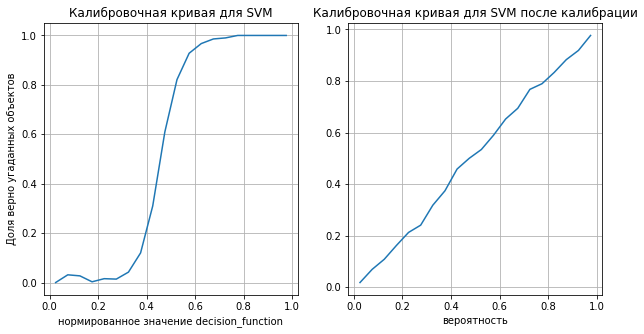

In [255]:
bin_middle_points = []
bin_real_ratios = []
n_bins = 20
fig = plt.figure(figsize=(10,5))

preds = SVM_semiproba
fig.add_subplot(121)
for i in range(n_bins):
    l = 1.0 / n_bins * i
    r = 1.0 / n_bins * (i + 1)
    bin_middle_points.append((r + l) / 2)
        
    count_catch = np.count_nonzero([(preds >= l) & (preds < r)])
    count_catch = count_catch if count_catch!=0 else 1
    bin_real_ratios.append(np.count_nonzero(y_test[(preds >= l) & (preds < r)] == 1) /
                               count_catch ) 
plt.grid(True)
plt.title('Калибровочная кривая для SVM')
plt.plot(bin_middle_points, bin_real_ratios)
plt.ylabel('Доля верно угаданных объектов')
plt.xlabel('нормированное значение decision_function')

bin_middle_points = []
bin_real_ratios = []
preds = calibrated_SVM_proba[:,1]
fig.add_subplot(122)
for i in range(n_bins):
    l = 1.0 / n_bins * i
    r = 1.0 / n_bins * (i + 1)
    bin_middle_points.append((r + l) / 2)
    # неравильно считался центр
        
    count_catch = np.count_nonzero([(preds >= l) & (preds < r)])
    count_catch = count_catch if count_catch!=0 else 1
    bin_real_ratios.append(np.count_nonzero(y_test[(preds >= l) & (preds < r)] == 1) /
                               count_catch ) 
plt.grid(True)
plt.title('Калибровочная кривая для SVM после калибрации')
plt.plot(bin_middle_points, bin_real_ratios)
plt.xlabel('вероятность');
plt.show()

Видим, что CalibratedClassifierCV очень хорошо справилась и откалибровала действительно теперь выдает приближенные значения вероятностей

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 2. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные с прошлогоднего конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [256]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [436]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=2)

__Задание 0.__ Посчитайте качество (в этом задании будем работать ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [437]:
start_time = time.time()
clf_reg = LogisticRegression().fit(X_train, y_train)
all_time_reg = time.time() - start_time

In [440]:
print('Время на обучение без кодирования категориальных признаков', all_time_reg)

Время на обучение без кодирования категориальных признаков 7.603641748428345


In [441]:
predict_reg = clf_reg.predict(X_test)
roc_auc_score(y_test, predict_reg)

0.5867340432027991

__Задание 1.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(1 балл)__

In [442]:
from sklearn.preprocessing import OneHotEncoder

In [443]:
list_name_cat_categories = list()
for i, name_cat in enumerate(data.columns):
    if name_cat[-3:] == 'cat':
        list_name_cat_categories.append(name_cat)

In [444]:
only_cat_train = X_train[list_name_cat_categories]
need_to_plus_one = only_cat_train.columns[(only_cat_train.min() == -1)]
only_cat_train[need_to_plus_one] += 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [445]:
X_train = X_train.drop(list_name_cat_categories, axis=1)

In [446]:
only_cat_test = X_test[list_name_cat_categories]
need_to_plus_one = only_cat_test.columns[(only_cat_test.min() == -1)]
only_cat_test[need_to_plus_one] += 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [447]:
X_test = X_test.drop(list_name_cat_categories, axis=1)

In [448]:
encoder = OneHotEncoder().fit(only_cat_train)
X_tmp = encoder.transform(only_cat_train).toarray()

In [449]:
X_train = np.hstack((X_train.values, X_tmp))

In [450]:
X_test = np.hstack((X_test.values, 
                    encoder.transform(only_cat_test).toarray()))

In [451]:
start_time = time.time()
clf_reg = LogisticRegression().fit(X_train, y_train)
all_time_reg_onehot = time.time() - start_time

In [452]:
print('Время обучения регрессии после кодирования', all_time_reg_onehot)

Время обучения регрессии после кодирования 19.0001060962677


In [340]:
predict_reg_onehot = clf_reg.predict(X_test)
roc_auc_score(y_test, predict_reg_onehot)

0.5948938065664708

Видим, что время обучения увеличилось почти в 2.5 раз, однако и score возрос на 0.008 Это довольно неплохой показатель, учитывая то, что в обучающей выборке не так много данных по отношению к тестовой и мы кодиовали самым простым способом

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 2.__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментов. Заметили ли вы что-то интересное?

__(2 балла)__

In [607]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=2)

In [608]:
train_only_cat_features = X_train[list_name_cat_categories].values
test_only_cat_features = X_test[list_name_cat_categories].values

In [601]:
def make_counters(only_cat_features, only_cat_features_test,  y):
    counted_features_tr = np.zeros(shape=(sparse_X_by_y.shape))
    counted_features_test = np.zeros(shape=(sparse_X_by_y.shape))
    for i, feature in enumerate(only_cat_features.T):
        
        # если есть отрицательный элемент, то увеличиваем все на 1
        if (feature == -1).any():
            only_cat_features[:,i] += 1   
            only_cat_features_test[:, i] += 1
        available = np.unique(only_cat_features[:,i])
        # для каждого уникального значения признака считаем его счетчик
        counter_every_unique = (np.bincount(only_cat_features[:,i]*y) / 
                                np.bincount(only_cat_features[:,i]))        
        # проходим по всем уникальным знаечниям, и меняем их на счетчики
        for prev_val, unique_val in enumerate(counter_every_unique):
            counted_features_tr[
                np.where(only_cat_features[:,i] == prev_val), i] = unique_val
            
            counted_features_test[
                np.where(only_cat_features_test[:,i] == prev_val), i] = unique_val
    
    return counted_features_tr, counted_features_test
            

Алгоритм, приведенный выше, конечно, не идеален. В нем есть циклы, да еще и вложенные, но общее количество итераций будет равно сумме уникальных значений какждого категориального признака. Как мы могли видеть раннее (при one-hot encoding) это количесвто около 200. Это нормальное число итераций, учитывая, что все остальные операции векторизованы и выполняются очень быстро. Также тут проиходит деление на ноль в ситуации, когда признак не принимает какое-то значение и bincount для него равен 0, но в этом случае ни одно значение не заменится на nan или inf, потому что признак ни разу его и не принял!


In [602]:
counted_x_train, counted_x_test = make_counters(train_only_cat_features, test_only_cat_features, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [609]:
X_test = X_test.drop(list_name_cat_categories, axis=1)
X_test = np.hstack((X_test.values, counted_x_test))

In [610]:
X_train = X_train.drop(list_name_cat_categories, axis=1)
X_train = np.hstack((X_train.values, counted_x_train))

In [611]:
start_time = time.time()
clf_reg = LogisticRegression().fit(X_train, y_train)
all_time_reg_count = time.time() - start_time
print('Время обучения регрессии после кодирования счетчиками', all_time_reg_count)
predict_reg_count = clf_reg.predict(X_test)
print('AUC-ROC на тесте при использовании счетчиков', roc_auc_score(y_test, predict_reg_count))

Время обучения регрессии после кодирования счетчиками 15.266245365142822
AUC-ROC на тесте при использовании счетчиков 0.5910556256757136


Видим, что качество по сравнению с исходными данными качество улучшилось на полпроцента, но это хуже, чем при one-hot кодировании. Объясняется это тем, что при one-hot кодировании у нас все-таки намног обольше признаков и обучатся алгоритму легче, однако время обучения со счетчиками заметно меньше - ведь количесвто признаков в этом случае не изменилось. Также отметим, что мы не нормировали данные, а счетчики принимают очень близкие значения к 0.5. Получается, что все данные не нормированы, а счетчики наоборот, поэтому, скорее всего, регуляризатор в SVM зануляет веса, соответсвующие счетчикам и мы не видим большого преимущества

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__Задание 3.__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

__(1 балл)__

__(Бонусная часть)__ Посчитайте корректные счётчики первым или вторым способов из описанных выше (не забудьте добавить и шум). 

__(+0.5 балла)__

In [621]:
X_train_noize = copy(X_train)
num_cat = counted_x_train.shape[1]

In [622]:
X_train_noize[:,-num_cat:] += np.random.random_sample(
                                (counted_x_train.shape))/50

In [628]:
for denominator in [10, 20, 50, 100, 200, 1000]:
    X_train_noize = copy(X_train)
    X_train_noize[:,-num_cat:] += np.random.random_sample(
                                (counted_x_train.shape))/denominator
    print('Добавочный шум от 0 до {0}'.format((1/denominator)) )
    start_time = time.time()
    clf_reg = LogisticRegression().fit(X_train_noize, y_train)
    all_time_reg_count = time.time() - start_time
    print('Время обучения', all_time_reg_count)
    predict_reg_count = clf_reg.predict(X_test)
    print('AUC-ROC на тесте', 
          roc_auc_score(y_test, predict_reg_count))

Добавочный шум от 0 до 0.1
Время обучения 10.347066879272461
AUC-ROC на тесте 0.5545959910544839
Добавочный шум от 0 до 0.05
Время обучения 12.977542877197266
AUC-ROC на тесте 0.5789388747881968
Добавочный шум от 0 до 0.02
Время обучения 17.565927982330322
AUC-ROC на тесте 0.5868915932075015
Добавочный шум от 0 до 0.01
Время обучения 15.659001588821411
AUC-ROC на тесте 0.5897237940732506
Добавочный шум от 0 до 0.005
Время обучения 16.273687601089478
AUC-ROC на тесте 0.5908733961449582
Добавочный шум от 0 до 0.001
Время обучения 15.123345851898193
AUC-ROC на тесте 0.591376203113095


Здесь мы используем небольшую сетку параметров, чтобы подобрать шум. Видим, что результат, даже лучшей предыдущего достигается, елси добавить шум от 0 до $10^{-3}$ - это довольно логично, ведь значения счетчиков сами меньше единицы и при добавлении сравнительн обольшого шума мы лишаем эти признаки значимости

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 4.__ Добавьте сглаживание, описанное выше и повторите эксперименты.

__(2 балла)__

Понятно, что если значение категории встречается редко, то значения счетчика на ней будут очень сильно зависеть от целевой переменной, а значит алгоритм на объектах с этой категорией очень перееобучится. Это может быть большой проблемой при оптимизации градиентным спуском

In [630]:
def make_counters_smoothing(only_cat_features, only_cat_features_test,  y):
    counted_features_tr = np.zeros(shape=(sparse_X_by_y.shape))
    counted_features_test = np.zeros(shape=(sparse_X_by_y.shape))
    C_coef = 10
    for i, feature in enumerate(only_cat_features.T):
        
        # если есть отрицательный элемент, то увеличиваем все на 1
        if (feature == -1).any():
            only_cat_features[:,i] += 1   
            only_cat_features_test[:, i] += 1
        available = np.unique(only_cat_features[:,i])
        # для каждого уникального значения признака считаем его счетчик
        counter_every_unique = ((np.bincount(only_cat_features[:,i]*y) + C_coef/2) / 
                                (np.bincount(only_cat_features[:,i])+C_coef) )        
        # учли, то что среднее значение целевой переменной равно 0.5
        # проходим по всем уникальным знаечниям, и меняем их на счетчики
        for prev_val, unique_val in enumerate(counter_every_unique):
            counted_features_tr[
                np.where(only_cat_features[:,i] == prev_val), i] = unique_val
            
            counted_features_test[
                np.where(only_cat_features_test[:,i] == prev_val), i] = unique_val
    
    return counted_features_tr, counted_features_test

In [631]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=2)
train_only_cat_features = X_train[list_name_cat_categories].values
test_only_cat_features = X_test[list_name_cat_categories].values
counted_x_train, counted_x_test = make_counters_smoothing(train_only_cat_features, test_only_cat_features, y_train)
X_test = X_test.drop(list_name_cat_categories, axis=1)
X_test = np.hstack((X_test.values, counted_x_test))
X_train = X_train.drop(list_name_cat_categories, axis=1)
X_train = np.hstack((X_train.values, counted_x_train))

In [632]:
for denominator in [100, 200, 1000, 2000, 5000]:
    X_train_noize = copy(X_train)
    X_train_noize[:,-num_cat:] += np.random.random_sample(
                                (counted_x_train.shape))/denominator
    print('Добавочный шум от 0 до {0}'.format((1/denominator)) )
    start_time = time.time()
    clf_reg = LogisticRegression().fit(X_train_noize, y_train)
    all_time_reg_count = time.time() - start_time
    print('Время обучения', all_time_reg_count)
    predict_reg_count = clf_reg.predict(X_test)
    print('AUC-ROC на тесте', 
          roc_auc_score(y_test, predict_reg_count))

Добавочный шум от 0 до 0.01
Время обучения 10.376035451889038
AUC-ROC на тесте 0.5819382341077246
Добавочный шум от 0 до 0.005
Время обучения 12.487840414047241
AUC-ROC на тесте 0.5815382890649653
Добавочный шум от 0 до 0.001
Время обучения 13.161453247070312
AUC-ROC на тесте 0.5809851114395551
Добавочный шум от 0 до 0.0005
Время обучения 11.90217661857605
AUC-ROC на тесте 0.5808957211829855
Добавочный шум от 0 до 0.0002
Время обучения 10.258118152618408
AUC-ROC на тесте 0.5809065122381019


Видим, что при сглаживании результаты не улучшились, а при добавлении небольшого шума даже становятся хуже. Связано это может быть, как уже было сказано с немасштабированностью других признаков. Также стоит отметить, что коэффициент C, конечно, нужно подбирать по кросс-валидации.

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

__Ответ:__ ...

Плюсы:
1. Боллее быстрое время обучения (оно и понятно, не добавляем кучу признаков)
2. Не съедают много памяти
3. Обязательно масштабировать данные для регрессии

Минусы:
1. Все же результат мы получили хуже
2. Необходимо искусствеено зашумлять данные 

В целом же при тщательном подборе и умелом использовании счетчики, коненчо, выигрывают one-hot-кодирование